In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pickle_in = open("msftdf.pickle","rb")
df = pickle.load(pickle_in)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,...,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,...,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,...,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,-0.000176,0.062192,-0.342167
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,...,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,-0.000400,0.062765,-0.353893
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,...,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,-0.000439,0.062893,-0.381002
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,...,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,-0.000376,0.062775,-0.375895


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8857 non-null   datetime64[ns]
 1   Open                  8857 non-null   float64       
 2   High                  8857 non-null   float64       
 3   Low                   8857 non-null   float64       
 4   Close                 8857 non-null   float64       
 5   Adj Close             8857 non-null   float64       
 6   Volume                8857 non-null   int64         
 7   year                  8857 non-null   int64         
 8   month                 8857 non-null   int64         
 9   day_of_week           8857 non-null   int64         
 10  week                  8857 non-null   UInt32        
 11  day                   8857 non-null   int64         
 12  change                8857 non-null   float64       
 13  change_in_percenta

In [13]:
df['Target'] = df['change_in_percentage'].apply(lambda x: '1' if x >0 else '0')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,...,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns,Target
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,...,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751,NaN,1
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,...,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,-0.000176,0.062192,-0.342167,1
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,...,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,-0.000400,0.062765,-0.353893,1
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,...,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,-0.000439,0.062893,-0.381002,0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,...,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,-0.000376,0.062775,-0.375895,0


In [14]:
#Now we have all the features we needed

In [15]:
df['Target'].value_counts()

0    4484
1    4373
Name: Target, dtype: int64

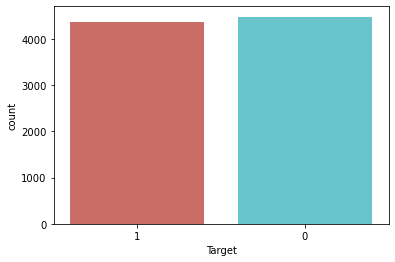

In [18]:
sns.countplot(x='Target', data=df, palette="hls")
plt.show()

In [19]:
df['Returns'] = df['Returns'].fillna(0)

In [20]:
X = pd.DataFrame(df.iloc[:,2:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Without Regularization

In [22]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\Yas_PC\Currently Installed Softwares\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [23]:
y_pred = logmodel.predict(X_test)

In [24]:
print("Accuracy", (logmodel.score(X_test, y_test)))

Accuracy 0.510158013544018


In [25]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[904   0]
 [868   0]]


# With Regularization


In [35]:
logreg = LogisticRegression(penalty='l1',C=0.05, solver='liblinear')
logreg.fit(X_train, y_train)

D:\Yas_PC\Currently Installed Softwares\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
print("Accuracy", (logreg.score(X_test, y_test)))

Accuracy 0.9904063205417607


In [43]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[901   3]
 [ 14 854]]
